# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [2]:
# %pip install --upgrade plotly

### Import Statements

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [5]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [6]:
#df_data.shape
#962 rows and 16 columns
#Rows for the winners and columns for categories
#df_data.columns
#First year was 1901 and 2020 is the last year
#df_data['year']

**Challenge**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [7]:
#df_data.duplicated(subset=['prize', 'full_name']).value_counts()

### Check for NaN Values

In [8]:
#df_data.isna().sum().sum()
#1023 na values

In [9]:
df_data.isna().sum()
#The organization name,city,country,motivation and birth data tend to have more na values
#we can see which columns have how many na values with the above method

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [10]:
#It seems like a lot of the background data is unknown for missing for the prize winners 
#So there is missing data.

In [11]:
col_subset = ['year','category', 'laureate_type',
              'birth_date','full_name', 'organization_name']
#df_data.loc[df_data.birth_date.isna()][col_subset]
#Looking closer the name of the org is under the full_name column
#Which leaves the other columns empty
#Also not everyone is associated with an organization or university
#Most of these are Peace prize winners

In [12]:
#col_subset = ['year','category', 'laureate_type','full_name', 'organization_name']
#df_data.loc[df_data.organization_name.isna()][col_subset]
#some literature here for no org name

### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [13]:
df_data['birth_date'] = pd.to_datetime(df_data['birth_date'])


#### Add a Column with the Prize Share as a Percentage

In [14]:
def fraction_to_percentage(fraction):
    numerator, denominator = fraction.split('/')
    return float(numerator) / float(denominator) *100
df_data['share_pct'] = df_data['prize_share'].apply(fraction_to_percentage)
#int(df_data['prize_share'][0].split("/")[0]) / int(df_data['prize_share'][0].split("/")[1]) * 100


In [15]:
#Angela way same logic but no apply function calls
#I like using the apply makes a more pythonic sense
#Although expanding into 2 columnds is a nice pandas way
#separated_values = df_data.prize_share.str.split('/', expand=True)
#numerator = pd.to_numeric(separated_values[0])
#denomenator = pd.to_numeric(separated_values[1])
#df_data['share_pct'] = numerator / denomenator

In [16]:
#Continue Here
#Dont create any chart before brainstorming a few questions i would like answers to from the data
#Has the male-female rate changed over the years
#Which countries have the most winners
#Have the countries changed over the years?
#Do different categories have different gender ratios
#Do some countries win in only some fields?

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [17]:
gender_winners = df_data.groupby('sex').count()
fig = px.pie(labels= gender_winners.index.values, 
             values=gender_winners.prize, 
             title="Category Breakdown",
             names=gender_winners.index.values,
             hole=0.4)

fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()
#Only 6.21% went to women

In [18]:
#gender_winners = df_data.groupby('sex').count()

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [19]:
female_winners = df_data[df_data['sex']== 'Female'].sort_values('year', ascending=True)[:3]
#First 3 winners
#female_winners['full_name'].head(3)

In [20]:
#female_winners['category'].head(3)
#First 3 were physics, peace prize and literature
#female_winners['birth_country']
#Mother Theresa
#female_winners.loc[501]
#female_winners
#No organization

# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [21]:
#All winners with that have won more than once
duplicated_winners = df_data[df_data.duplicated(subset=['full_name'],keep=False)]
#len(duplicated_winners)
#7 duplicated values
#If keep is false we get all occurences
#If keep param is not specified then we only get each duplicate after the first occurence
#duplicated_winners['full_name']

# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [22]:
#6 categories
#df_data.category.nunique()
winner_per_category = df_data['category'].value_counts()

In [23]:
#winner_categories_chart = px.bar(winner_per_category,
#                                 x=winner_per_category.index, 
#                                 y=winner_per_category.values,
#                                 color=winner_per_category.values,
#                                 color_continuous_scale="Aggrnyl",)

#winner_categories_chart.update_layout(coloraxis_showscale=False, xaxis_title = "Category", yaxis_title='Number of Winner')

In [24]:
#Medicine has the most amount of prizes vs economics at the bottom
#I think it is probably due to medicine being more cooperative and needing a team to do
#nobel prize worthy research

**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [25]:
#df_data[df_data['category'] == "Economics"]
#Well that explains why economics has much fewer prizes
#The first one was in 1969 to Jan Tinbergen and Ragnar Frisch

# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [26]:
gender_winners = df_data.groupby(["category", 'sex'],
                                 as_index=False).count().sort_values(by='prize',ascending=False)
                                #.agg({'prize': pd.Series.count})
                                # Or like this + cat_men_women.sort_values('prize', ascending=False, inplace=True)
#fig = px.bar(gender_winners,
#             x="category",
#             y=gender_winners['prize'],
#             color='sex',
#             barmode="relative",
#             title="Gender Split per Category",
#             height=700,
#             )
#fig.update_layout(yaxis={'categoryorder':'total descending'},
#xaxis_title='Category',yaxis_title='Number of Winners')
#fig.show()
#

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [27]:
#number of prizes per year
import matplotlib.dates as dates
years_fmt = dates.DateFormatter("%Y")

winners_per_year = df_data.groupby('year').count()['prize']
moving_average = winners_per_year.rolling(window=5).mean()
#prizes = winners_per_year['prize'].rolling(window=5).mean().dropna()

In [28]:
#plt.figure(figsize=(16,8),dpi=200)
#plt.title("Number of Nobel prizes awarded per year", fontsize = 18)
#plt.yticks(fontsize=14)
#plt.xticks(ticks=np.arange(1900, 2021, step=5),
#           fontsize=14,
#           rotation=45)
#ax  = plt.gca()
#ax.set_xlim(1900, 2020)
#plt.scatter( 
#        x=winners_per_year.index, 
#        y=winners_per_year.values,
#        c='dodgerblue',
#        alpha=0.7
#        )
#plt.plot(winners_per_year.index,
#         moving_average.values,
#         c='crimson',
#         linewidth=3)
#
#plt.show()

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [29]:
#Prize shares per year
year_and_share = df_data.groupby(by='year').agg({'share_pct':pd.Series.mean})
#df_data.describe()
#With this i get 62.68% as the average share %
# I need to somehow add all of the shares and divide by number of entries to get the percentage
share_average = year_and_share.rolling(window=5).mean()

In [30]:
#from fractions import Fraction
#grouped = df_data.groupby('year')
#def calculate_percentage(group):
#    # get the sum of all prize shares in the group
#    total_share = group['prize_share'].apply(lambda x: Fraction(x))
#    # divide the total share by the number of entries in the group
#    percentage = total_share / len(group)
#    # return the percentage
#    return percentage
#
## apply the custom function to each group
#percentages = grouped.apply(calculate_percentage)

In [31]:
#year_and_share is the percentages and year
#share_average is the rolling mean

In [32]:
#plt.figure(figsize=(16,8),dpi=200)
#plt.title("Shared Prizes per year", fontsize = 18)
#plt.yticks(fontsize=14)
#plt.xticks(ticks=np.arange(1900, 2021, step=5),
#           fontsize=14,
#           rotation=45)
#ax  = plt.gca()
#ax.set_xlim(1900, 2020)
#ax2 = ax.twinx()
#ax.scatter( 
#        x=winners_per_year.index, 
#        y=winners_per_year.values,
#        c='dodgerblue',
#        alpha=0.7,
#        s=100
#        )
#ax.plot(winners_per_year.index,
#         moving_average.values,
#         c='crimson',
#         linewidth=3)
#ax2.plot(year_and_share.index,
#         share_average.values,
#         c='grey',
#         linewidth=3)
#ax2.invert_yaxis()
#
#plt.show()

# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [33]:
#This seems to work to get 2 columnds and sum the prizes up per country
#Let's check the best column
#Current seems to work ok, no old countries or missing data it seems but lets see
top_20 = df_data.groupby(by='birth_country_current',as_index=False).agg({'prize':pd.Series.count}).sort_values(by='prize',ascending=True)
#I don't notice much of a difference seems to work the same
#top_20 = df_data.groupby(by='birth_country',as_index=False).agg({'prize':pd.Series.count}).sort_values(by='prize',ascending=False)
#Organization country has a lot more concentration plus a lot of missing values
#top_20 = df_data.groupby(by='organization_country',as_index=False).agg({'prize':pd.Series.count}).sort_values(by='prize',ascending=False)

top_20 = top_20[-20:]
top_20


,birth_country_current,prize
7,Belgium,9
31,Hungary,9
33,India,9
2,Australia,10
20,Denmark,12
54,Norway,12
13,China,12
51,Netherlands,18
3,Austria,18
39,Italy,19


In [34]:
#hbar = px.bar(x=top_20['prize'],
#            y=top_20['birth_country_current'] ,
#            orientation='h',
#            title="Nobel Prizes per country",
#            color=top_20['prize'],
#             color_continuous_scale='Electric',
#             hover_name=top_20['birth_country_current'],
#             labels=top_20['birth_country_current'],
#             height=600)
#hbar.update_layout(xaxis_title = "Number of Prizes", yaxis_title='Country')
#hbar.show()

In [35]:
#CONTINUE HERE 

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [36]:

prizes_per_iso = df_data.groupby('ISO',as_index=False).agg({'prize':pd.Series.count}).sort_values(by='prize',ascending=True)

In [59]:
fig= px.choropleth(prizes_per_iso,locations='ISO',color='prize',hover_name='ISO',
                   color_continuous_scale=px.colors.sequential.Sunsetdark )
fig.show()

# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [38]:
country_category_prizes = df_data.groupby(['birth_country_current', 'category'],
                                          as_index=False).agg({"prize":pd.Series.count})

country_category_prizes['total_prize'] = country_category_prizes.groupby('birth_country_current'\
    )['prize'].transform('sum')

country_category_prizes = country_category_prizes.loc[country_category_prizes['total_prize']>=10]
country_category_prizes.sort_values(by='total_prize',inplace=True, ascending=True)
#country_category_prizes
#How angela did it
#merged_df = pd.merge(country_category_prizes, top_20, on='birth_country_current')

#merged_df
# change column names
#merged_df.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize'] 
#merged_df.sort_values(by='total_prize', inplace=True)

In [39]:
#hbar = px.bar(x=country_category_prizes['prize'],
#            y=country_category_prizes['birth_country_current'] ,
#            orientation='h',
#            title="Nobel Prizes per country, divided by category",
#            color=country_category_prizes['category'],
#            hover_name=country_category_prizes['category'],
#             labels=country_category_prizes['category'],
#             height=600)
#hbar.update_layout(xaxis_title = "Number of Prizes", yaxis_title='Country')
#hbar.show()

In [40]:
#In which category are Germany and Japan the weakest compared to the United States?
#Peace and economics as they have barely any prizes in those categories
#In which category does Germany have more prizes than the UK?
#That would be physics
# In which categories does France have more prizes than Germany?
#Literature and peace
# Which category makes up most of Australia's nobel prizes?
#Medicine with 7 out of 10
# Which category makes up half of the prizes in the Netherlands?
#Physics with 9
# Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?
#France has 57 in total and the US has 49 in economics so close.
#Physics and Medicine are definitely higher with 70 and 78,respectively.

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [41]:
prizes_year_country = df_data.groupby(['year','birth_country_current'],as_index=False).agg({"prize":pd.Series.count})
prizes_year_country= prizes_year_country.groupby(by=['birth_country_current',
                                              'year']).sum().groupby(level=[0]).cumsum()

prizes_year_country.reset_index(inplace=True)

linechart =px.line(prizes_year_country, x=['year'],y='prize',
        color='birth_country_current',
        height=800,
        hover_name='birth_country_current')

linechart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Prizes' )
linechart.show()


In [42]:
#It looks like the us domination started after WW2
#Before the leader wasn't just one Country,but a couple like the UK,France,Germany

In [43]:
#Angela way
prize_by_year = df_data.groupby(['birth_country_current', 'year'],as_index=False).count()
prize_by_year.sort_values('year')[['year', 'birth_country_current', 'prize']]

cumulative_prizes = prize_by_year.groupby(by=['birth_country_current',
                                              'year']).sum().groupby(level=[0]).cumsum()
    

cumulative_prizes.reset_index(inplace=True)
#cumulative_prizes



#px.line(cumulative_prizes,x='year',y='prize',color='birth_country_current')

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [44]:
top_organizations = df_data.groupby('organization_name',as_index=False).agg({'prize':pd.Series.count}).sort_values(by='prize',ascending=True)[-20:]


In [45]:
hbarorgs = px.bar(x=top_organizations['prize'],
            y=top_organizations['organization_name'] ,
            orientation='h',
            title="Nobel Prizes per organization",
            color=top_organizations['prize'],
             color_continuous_scale='Electric',
             hover_name=top_organizations['organization_name'],
             labels=top_organizations['organization_name'],
             height=600)
hbarorgs.update_layout(xaxis_title = "Number of Prizes", yaxis_title='Organization',coloraxis_showscale = False)
#hbarorgs.show()

In [46]:
#29 with Harvard and 20 with Uni of Chicago

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [47]:
top_cities = df_data['organization_city'].value_counts()[:20]
top_cities.sort_values(ascending=True, inplace=True)

In [48]:
hbarcities = px.bar(x=top_cities.values,
            y=top_cities.index,
            orientation='h',
            title="Nobel Prizes per organization City",
            color=top_cities.values,
             color_continuous_scale='Electric',
             hover_name=top_cities.index,
             labels=top_cities.index,
             height=600)
hbarcities.update_layout(xaxis_title = "Number of Prizes", yaxis_title='Organization City',coloraxis_showscale = False)
#hbarcities.show()

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\plotly\express\_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [49]:
birth_cities =  df_data['birth_city'].value_counts()[:20]
birth_cities.sort_values(ascending=True,inplace=True)

In [50]:
hbarbirthcities = px.bar(x=birth_cities.values,
            y=birth_cities.index.values,
            orientation='h',
            title="Nobel Prizes per Birth City",
            color=birth_cities.values,
             color_continuous_scale='Plasma',
             hover_name=birth_cities.index.values,
             labels=birth_cities.index.values,
             height=600)
hbarbirthcities.update_layout(xaxis_title = "Number of Prizes", yaxis_title='Birth City',coloraxis_showscale = False)
hbarbirthcities.show()



#London,Paris and Vienna have 19,26 and 14 winners respectively
#Percentage of Us winners born in new york is 53/281 which is the total number
#print(f"Percentage of NYC born US winners {round(53/281,2)}") #19%
#NYC and chicago are the 2 US cities in the top 5

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [51]:
top_organizations = df_data.groupby(['organization_name', 'organization_country', 'organization_city'],as_index=False).agg({'prize':pd.Series.count}).sort_values(by='prize',ascending=True)
#top_organizations


In [52]:
df = px.data.gapminder().query("year == 2007")
fig = px.sunburst(top_organizations, path=['organization_country', 'organization_city','organization_name'], 
                  values='prize',
                   hover_data=['prize'],
                   title="Where do discoveries take place?")
fig.update_layout(coloraxis_showscale = False,xaxis_title='Number of Prizes', 
                    yaxis_title='City')
#fig.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



In [53]:
#df_data['year']
#df_data['year'] = pd.to_datetime(df_data['year'], format = "%Y")
#dt.days turns into into a float
#df_data['winning_age'] = (df_data['year'] - df_data['birth_date']).dt.days //365 +1
#df_data['winning_age']

### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [54]:
#df_data.describe()
#Youngest was just 16 and a half years
#Max was 96 and a half
#Average age is 59.48 years
#75% are younger than 50 years 

In [55]:
#Youngest and oldest
#print(df_data['winning_age'].idxmax())
#df_data.iloc[937]
#John goodenough-Development of lithium-ion batteries at 96.5 years old
#print(df_data['winning_age'].idxmin())
#df_data.iloc[885]
#Malala Yousafzai-Peace prize in 2014 

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

In [56]:
#df_data.describe()

In [57]:
#plt.figure(figsize=(14,8),dpi=200)
#sns.histplot(data=df_data, x="winning_age", kde=True, bins=30)
#plt.xlabel('Distribution of Age at time of winning')
#plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


In [58]:
plt.figure(figsize=(14,8),dpi=200)
with sns.axes_style('whitegrid'):
    sns.regplot(data=df_data,x='year', y='winning_age',
                lowess=True,
                line_kws={'color': 'red'},
                scatter_kws={'alpha':0.4}
                )
plt.ylabel('Age at time of winning')
plt.xlabel('Year of Award given')
plt.ylim(1,df_data['winning_age'].max())
#plt.show()
#Up til the 40s the average age of the winner was mid 50s
#For 2020 the line seems to keep going up so the winner would be in his mid 60s
#The line starting going after after WW2 probably due to increased life spans

KeyError: 'winning_age'

<Figure size 2800x1600 with 0 Axes>

In [ ]:
df_data['year']=df_data['year'].dt.year

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

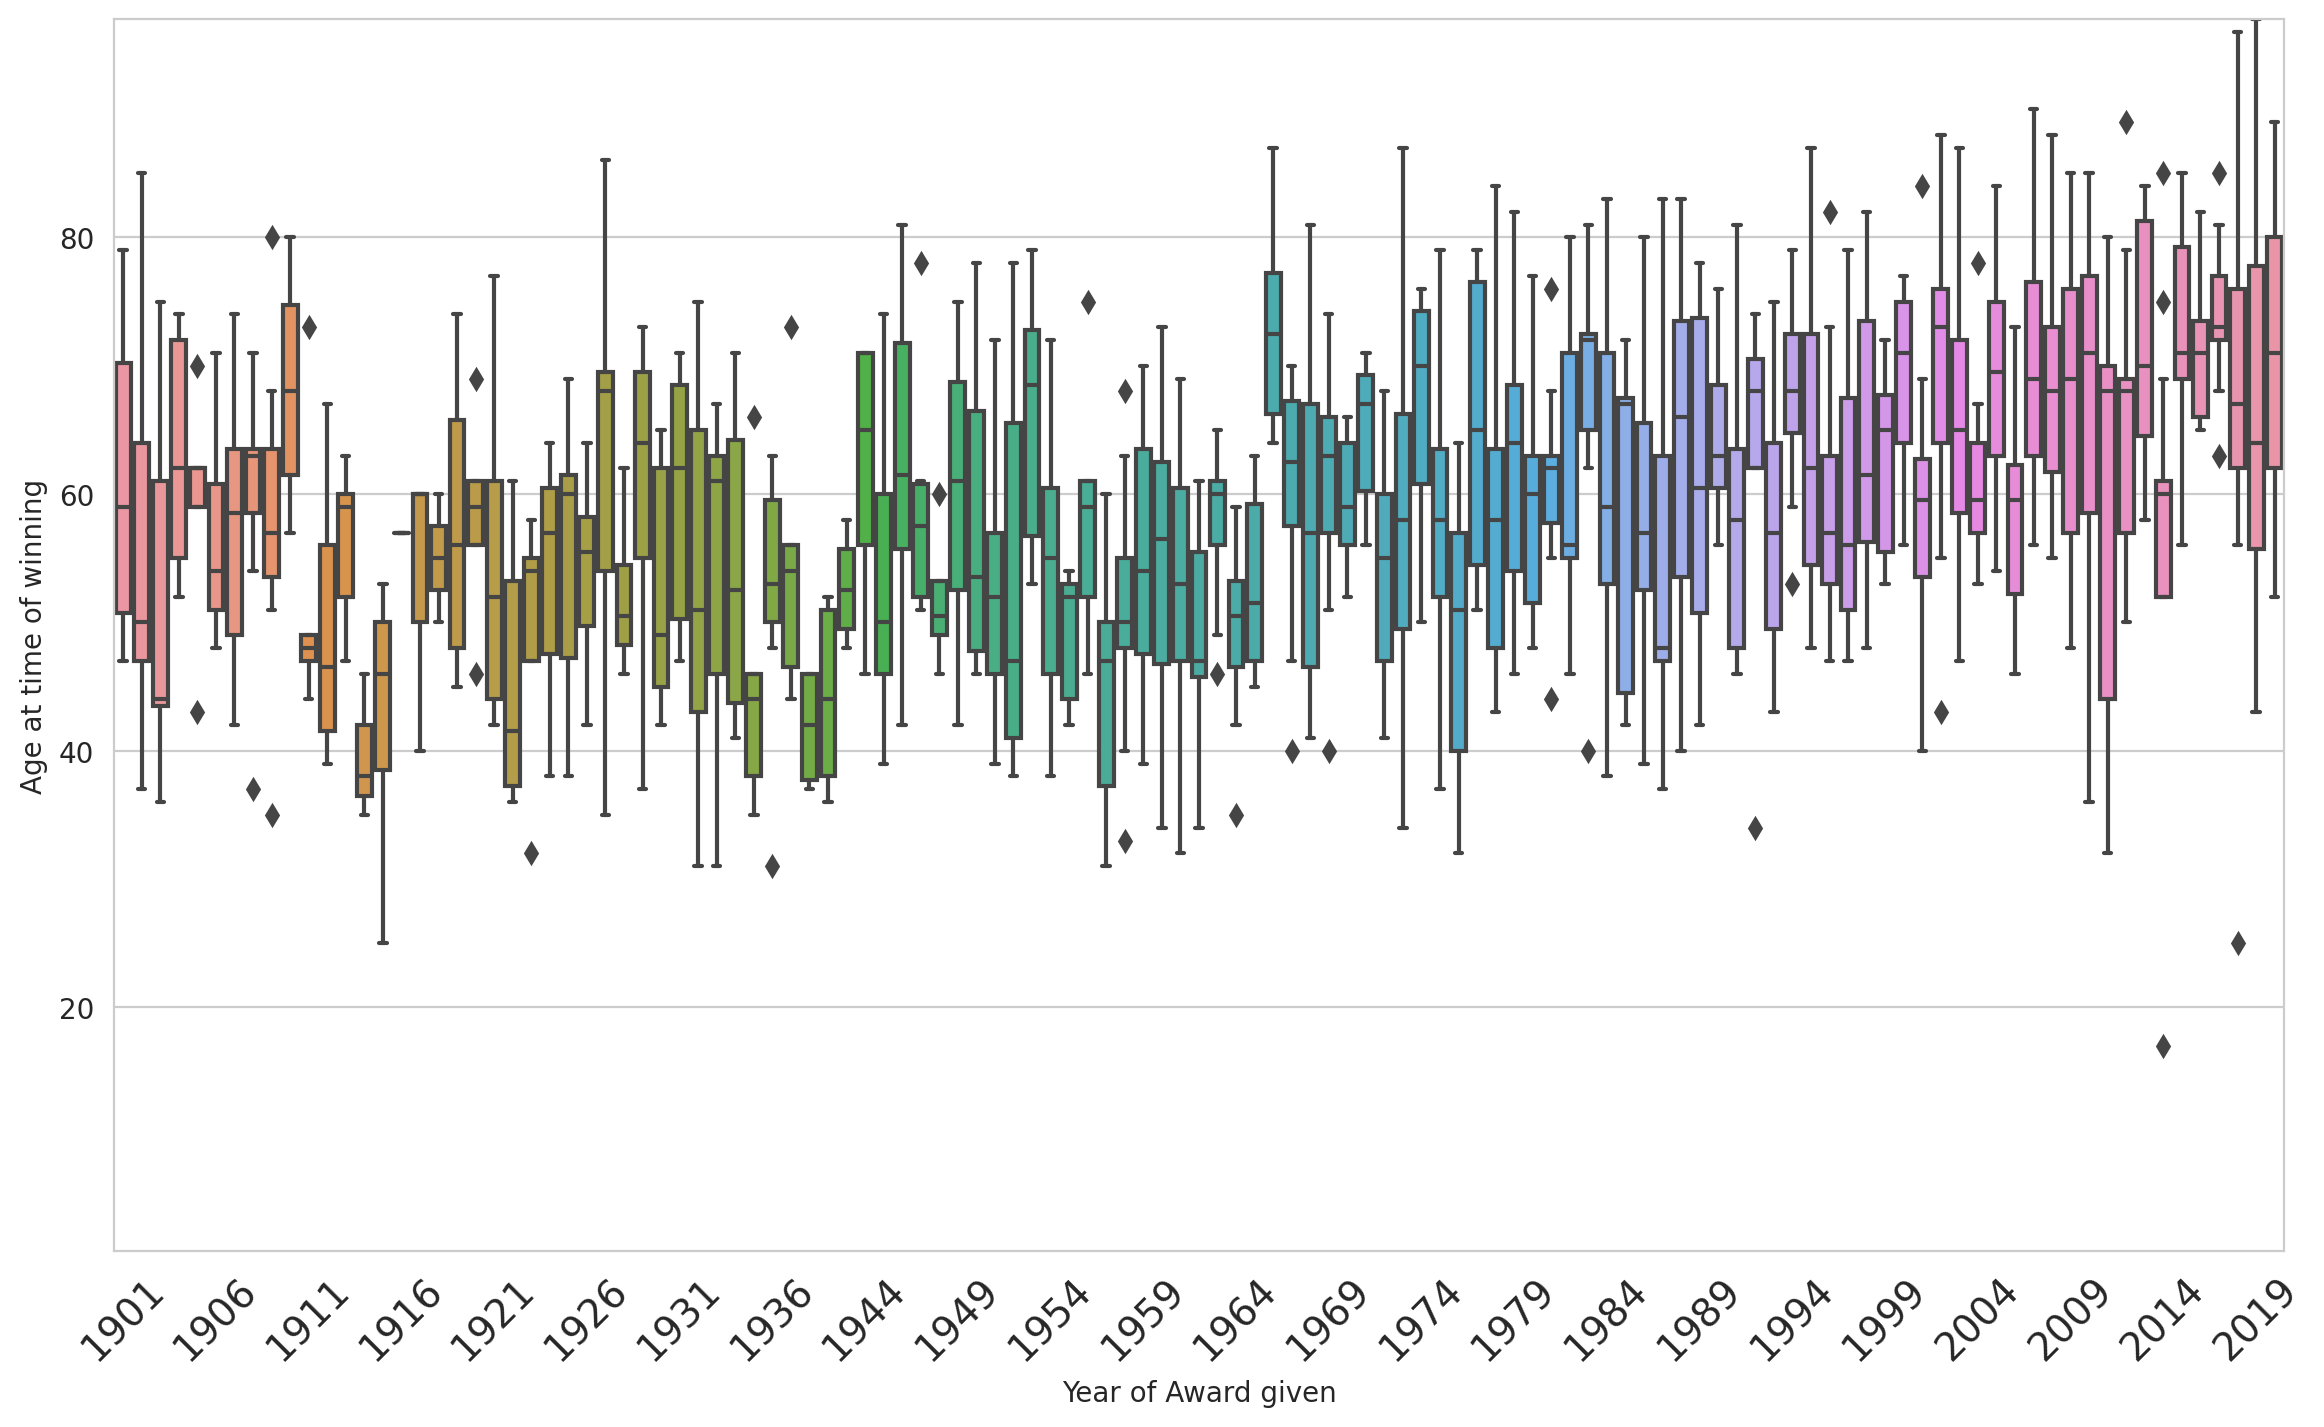

In [ ]:

plt.figure(figsize=(14,8),dpi=200)
with sns.axes_style('whitegrid'):
    sns.boxplot(data=df_data,x='year', y='winning_age'
                
                )
plt.ylabel('Age at time of winning')
plt.xlabel('Year of Award given')
plt.xticks(rotation=45,fontsize=14,)
plt.xticks(range(0, len(df_data["year"].unique()), 5))

# Set the x tick labels to the species names
#plt.xticks(range(0, len(df_data["year"].unique())), df_data["year"].unique())

plt.ylim(1,df_data['winning_age'].max())
plt.show()

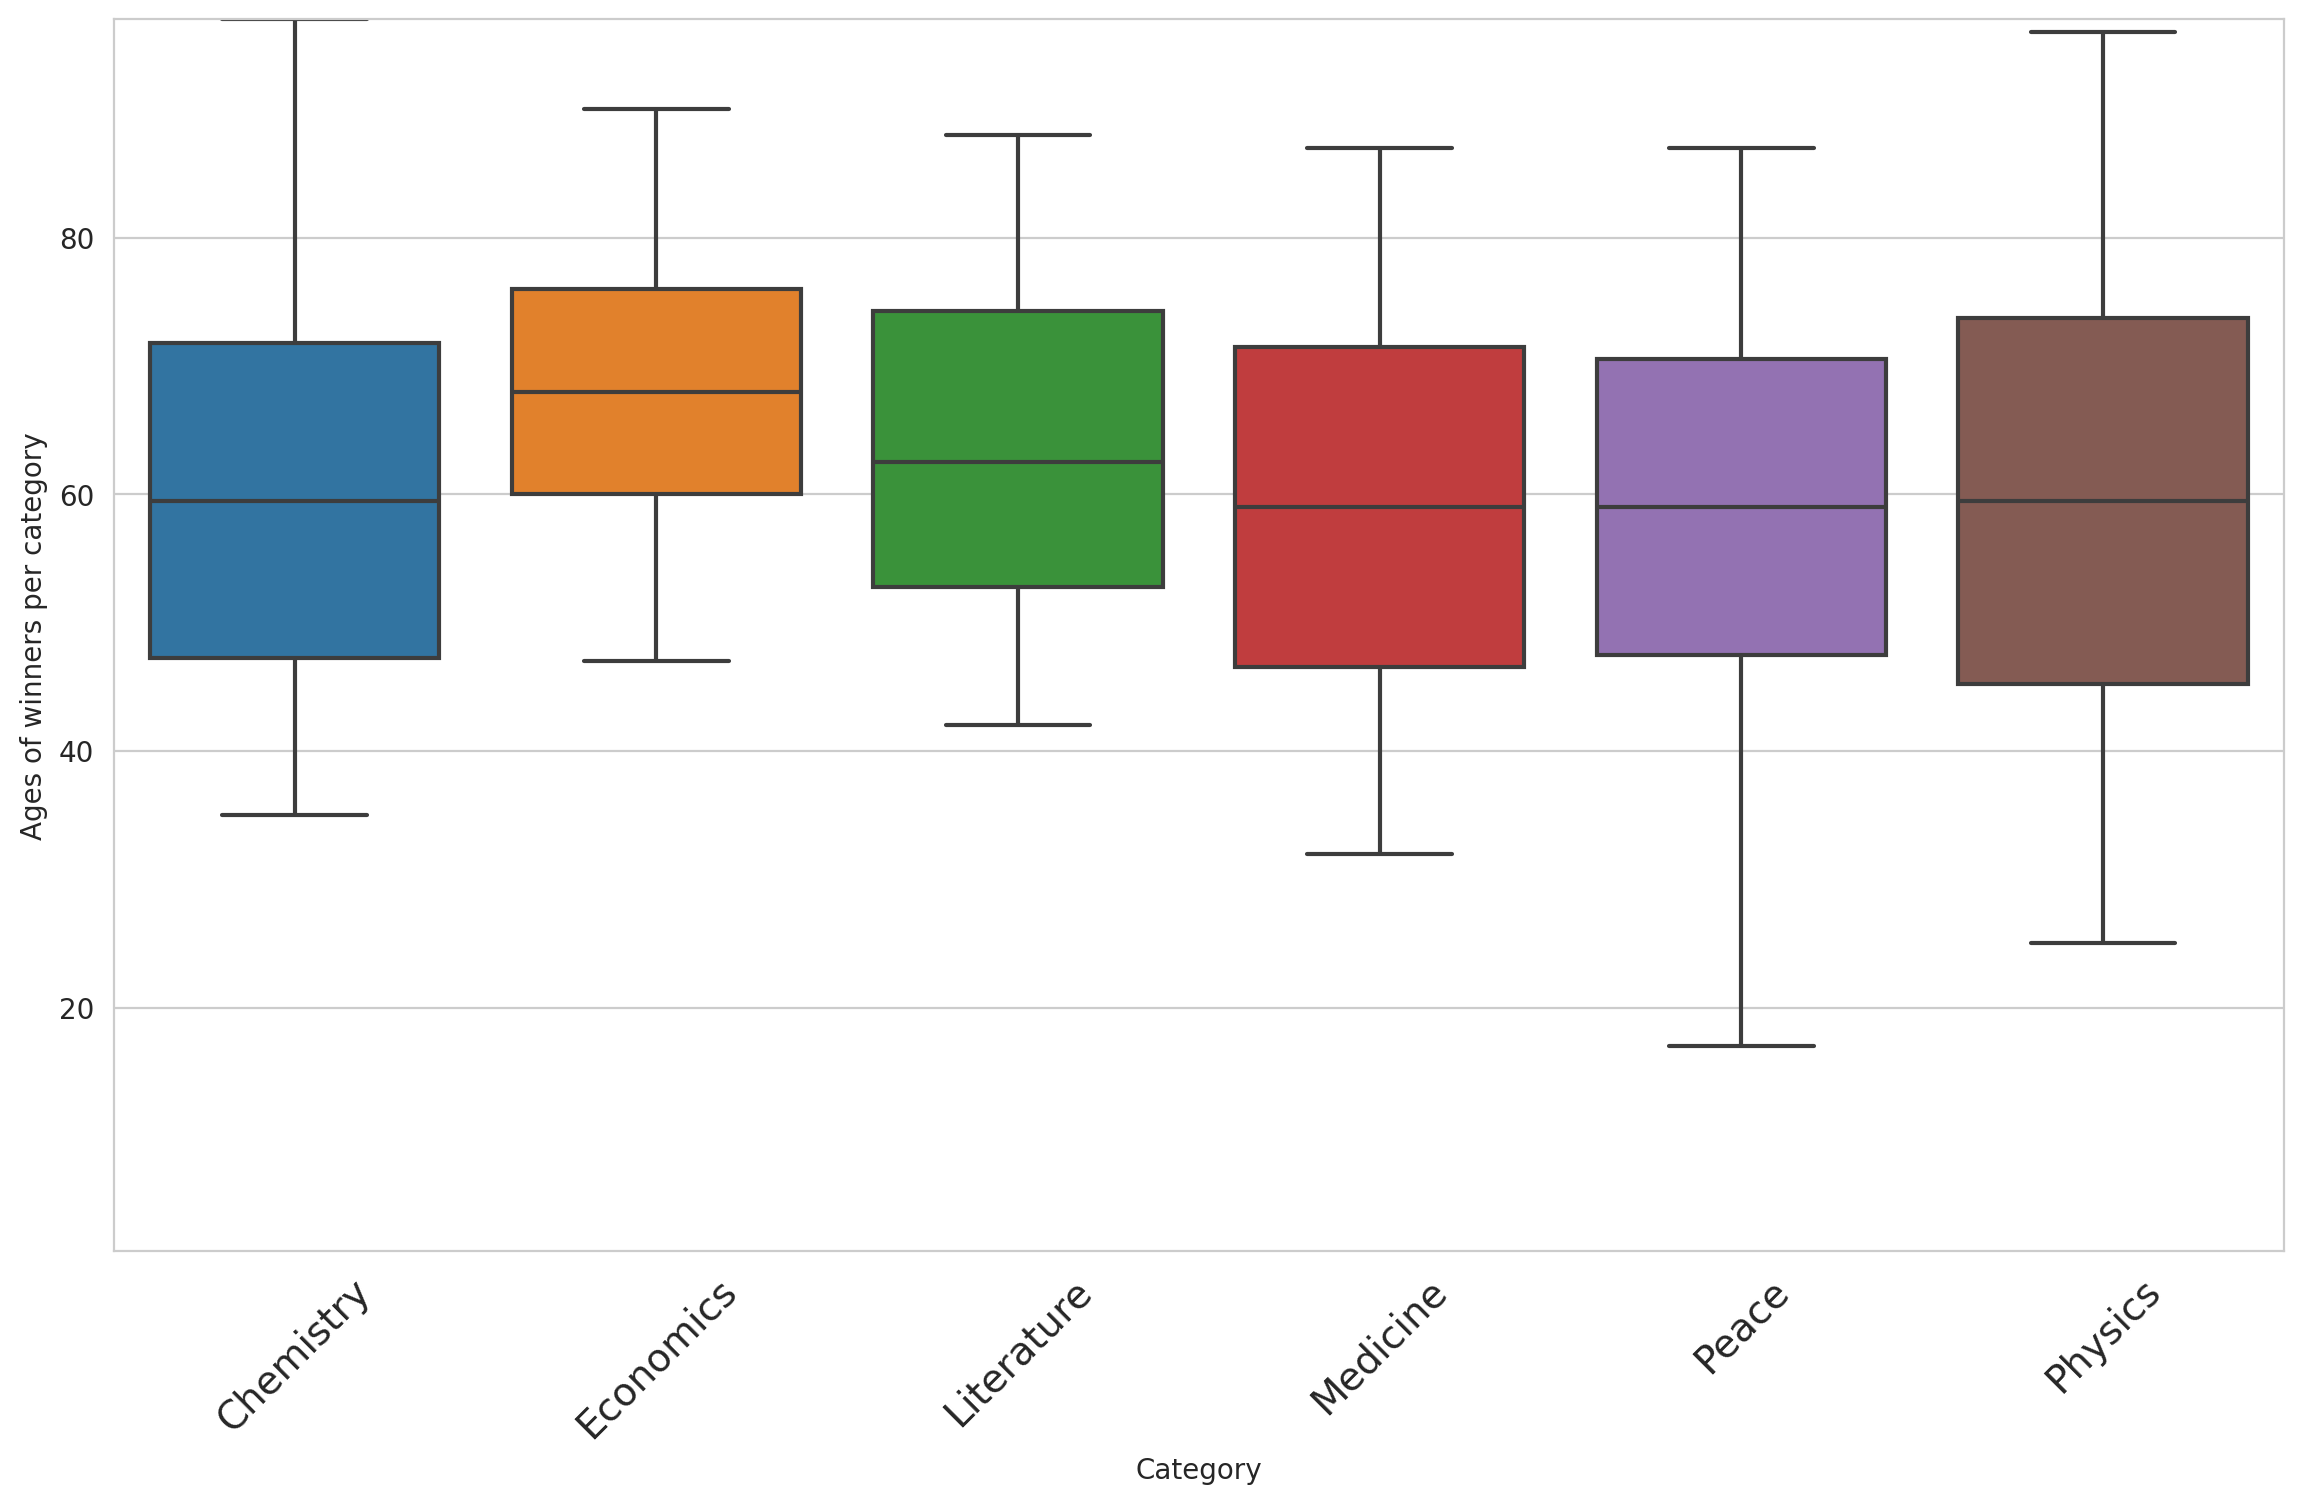

In [ ]:
age_and_cat = df_data.groupby(['category','winning_age'],as_index=False).count()
#plt.figure(figsize=(14,8),dpi=200)
#with sns.axes_style('whitegrid'):
#    sns.boxplot(data=age_and_cat,x='category', y='winning_age'
#               
#                )
#plt.ylabel('Ages of winners per category')
#plt.xlabel('Category')
#plt.xticks(rotation=45,fontsize=14,)
#
#
#plt.ylim(1,age_and_cat['winning_age'].max())
#plt.show()
#conomics seems to be the oldest proffesion on average and the smallest age span
#Chemistry and Physics seem to vary and have the biggest spans

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


[]

<Figure size 2800x1600 with 0 Axes>

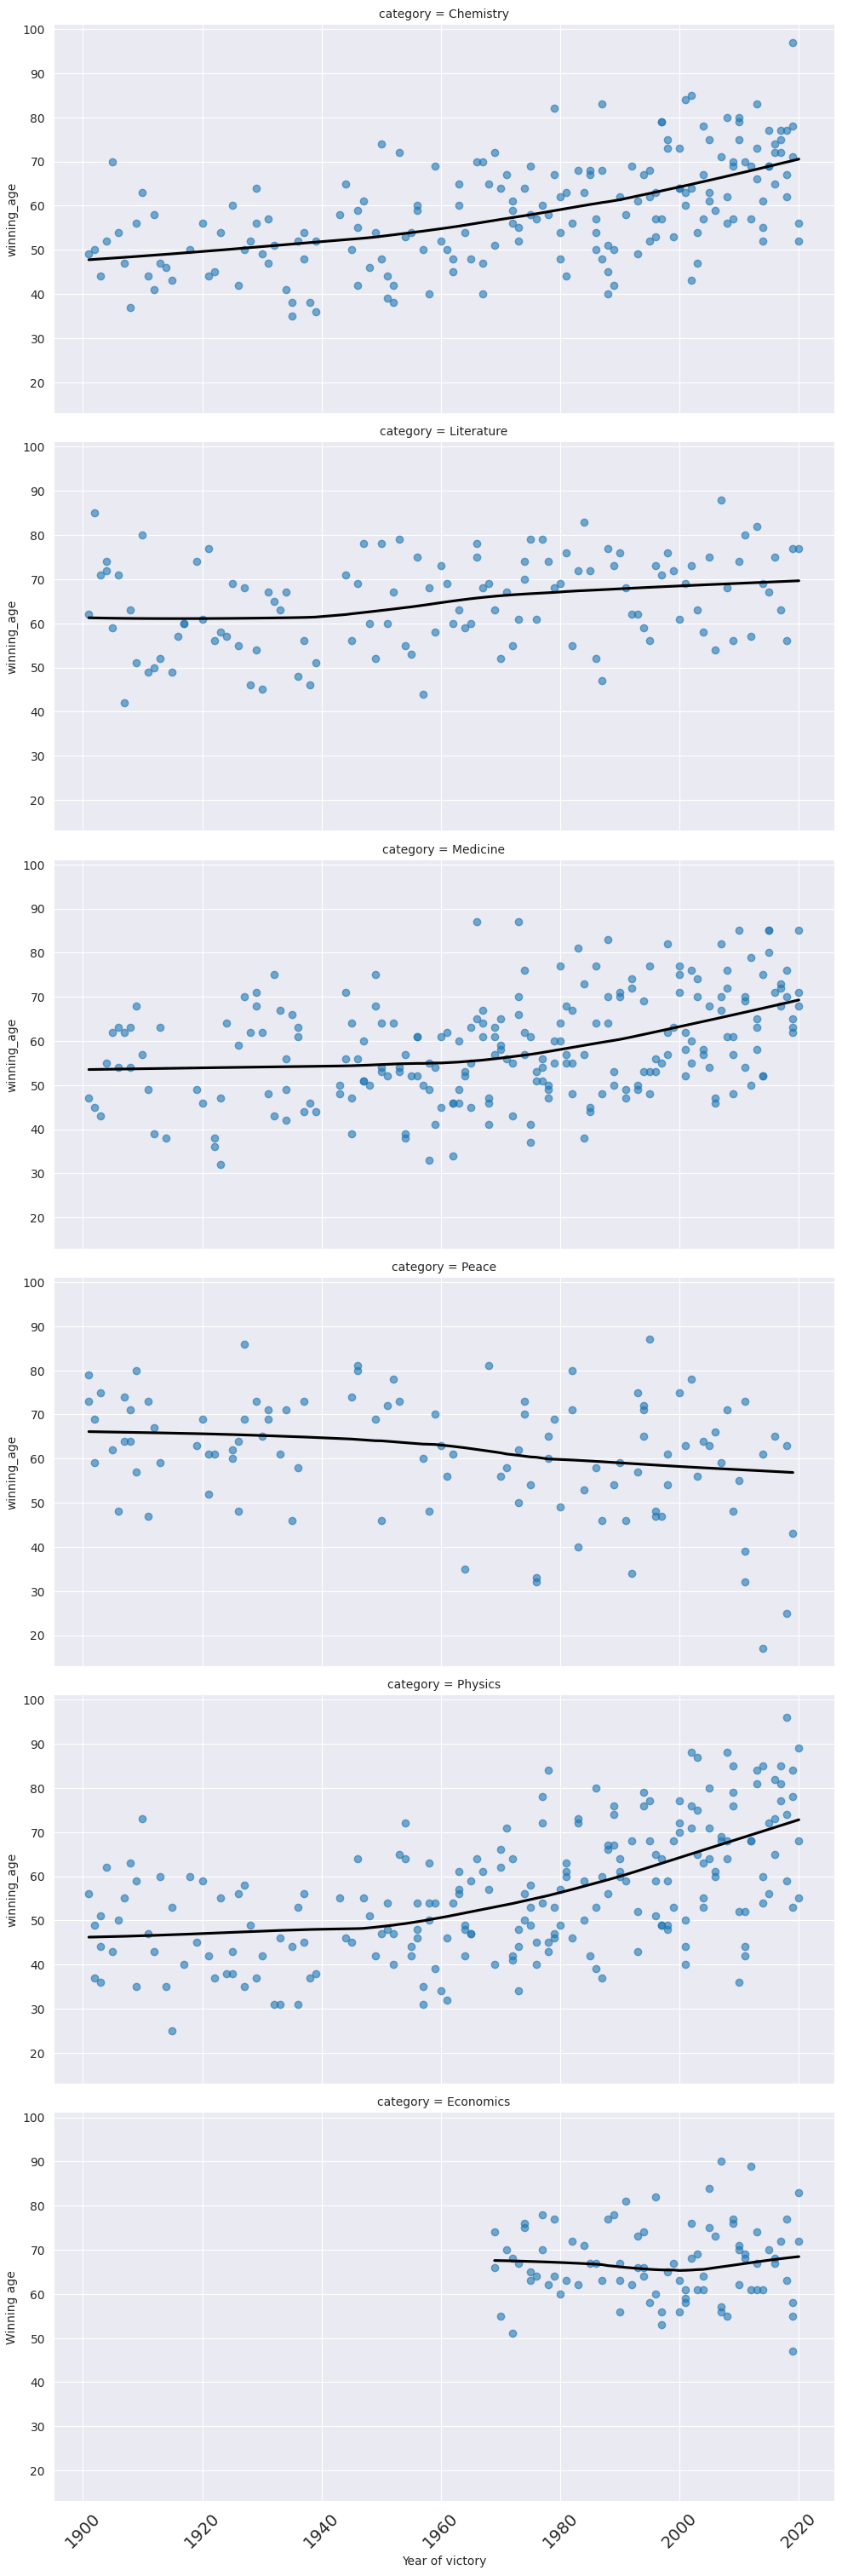

In [ ]:
plt.figure(figsize=(14,8),dpi=200)
with sns.axes_style('darkgrid'):
    sns.lmplot(data=df_data,x='year',y='winning_age',row='category',
               lowess=True, 
               aspect=2,
               scatter_kws = {'alpha': 0.6},
               line_kws = {'color': 'black'},)
    
plt.ylabel('Winning age')
plt.xlabel('Year of victory')
plt.xticks(rotation=45,fontsize=14,)
    
plt.plot()
#Some observartions
#The curve is not the same for all categories
#For hard sciences like Chemistry,physics and Medicine the age of the winners is going up and up

#The change for economics is not increasing at the same rate i.e. it is slower

#The change for literature is almost flat 

#For peace it is the only one going down

[]

<Figure size 2800x1600 with 0 Axes>

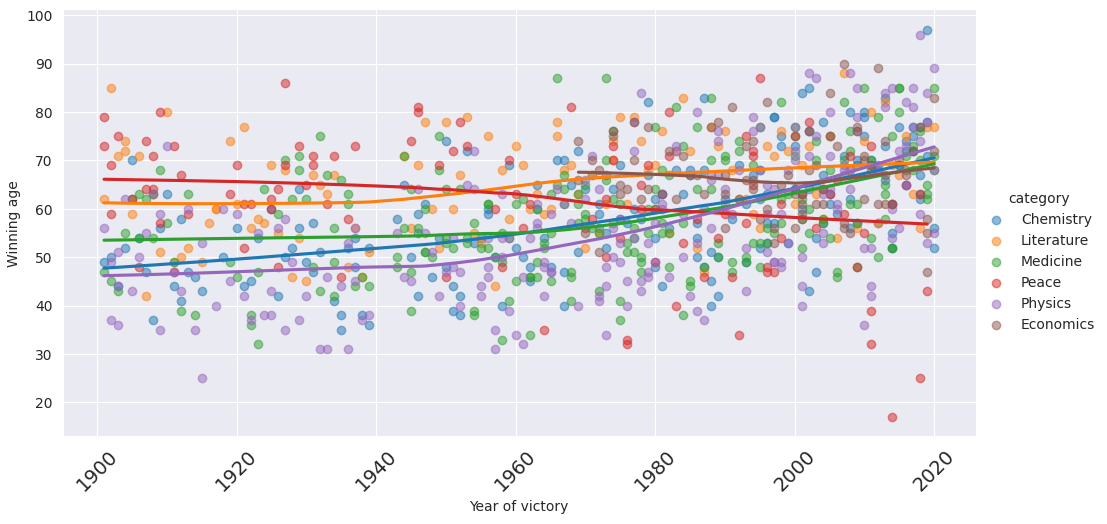

In [ ]:
plt.figure(figsize=(14,8),dpi=200)
with sns.axes_style('darkgrid'):
    sns.lmplot(data=df_data,x='year',y='winning_age',hue='category',
               lowess=True, 
               aspect=2,
               scatter_kws = {'alpha': 0.5},)
    
plt.ylabel('Winning age')
plt.xlabel('Year of victory')
plt.xticks(rotation=45,fontsize=14,)
    
plt.plot()
#Peace is getting a lot of very young winners since the 80s which is bringing the average age down
